In [1]:
import pandas as pd
import numpy as np
!conda install -c anaconda xlrd --yes
!pip install openpyxl
!conda install -c anaconda certifi
!pip install --upgrade certifi
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
!pip install folium
import folium
from folium.features import DivIcon
import matplotlib as mpl
import matplotlib.pyplot as plt

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.9

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.4.26  |       h06a4308_0         132 KB  anaconda
    openssl-1.1.1o             |       h7f8727e_0         3.8 MB  anaconda
    xlrd-2.0.1                 |     pyhd3eb1b0_0          92 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  openssl                                         pkgs/main --> anaconda
  xlrd                                            pkgs/main --> anaconda



ca-certificates-2022 | 132 KB    | #################################

In [2]:
# Descargamos el archivo de la poblacion de Montevideo por barrios desde la página del INE segun censo 2011.
# Mostramos las 10 primeras y 10 últimas filas para depurar inconsistencias
df_montevideo = pd.read_excel('https://www.ine.gub.uy/c/document_library/get_file?uuid=4718ab8a-c64e-439c-ba8e-7d56371b6c89&groupId=10181')
print(df_montevideo.head(10))
print(df_montevideo.tail(10))

  Población por sexo, según barrio. Montevideo Unnamed: 1 Unnamed: 2  \
0                                          NaN        NaN        NaN   
1                                          NaN     Código        NaN   
2                                       Barrio  de barrio      Total   
3                                          NaN        NaN        NaN   
4                                          NaN        NaN        NaN   
5                                        Total        NaN    1318755   
6                                          NaN        NaN        NaN   
7                                 Ciudad Vieja          1      12555   
8                                       Centro          2      22120   
9                                   Barrio Sur          3      12639   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1       Sexo        NaN  
2     Hombre      Mujer  
3        NaN        NaN  
4        NaN        NaN  
5     613756     704999  
6        NaN        NaN  

In [3]:
# Depuramos filas y columnas con datos inconsistentes y renombramos columnas.
df_montevideo = df_montevideo.drop([0,1,2,3,4,5,6, 69,70,71,72,73], axis = 0).drop(['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df_montevideo.rename(columns= {'Población por sexo, según barrio. Montevideo': 'Barrio', 'Unnamed: 2':'Poblacion'}, inplace = True)
# Ordenamos de forma descendente por poblacion y  mostramos el Dataframe final.
df_montevideo.sort_values('Poblacion', ascending = False, inplace = True)
df_montevideo

,Barrio,Poblacion
14,Pocitos,67992
10,Cordón,42456
29,Unión,39880
43,"La Paloma, Tomkinson",37424
15,Buceo,36998
...,...,...
51,La Figurita,11273
53,La Blanqueada,9600
50,Jacinto Vera,8767
22,Bañados de Carrasco,8705


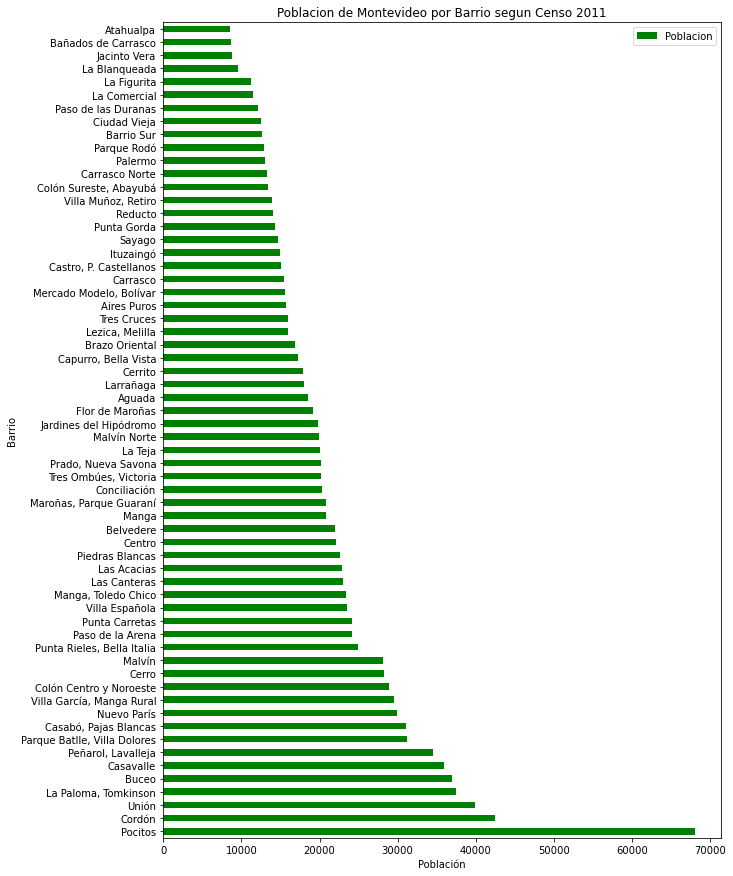

In [4]:
# Visualizamos los barrios por medio de un gráfico de barras horizontales
df_montevideo.set_index('Barrio').plot(kind='barh', figsize=(10,15) , color = 'green')
plt.xlabel('Población')
plt.ylabel('Barrio')
plt.title('Poblacion de Montevideo por Barrio segun Censo 2011')
plt.show()

In [5]:
# Descargamos Los datos de barrios por municipio.
#(fuente : https://gsutter.medium.com/c%C3%B3mo-leer-tablas-html-con-pandas-ef1c59ffa81a)
df_montevideo_municipios = pd.read_html('https://es.wikipedia.org/wiki/Anexo:Barrios_de_Montevideo')
# Determinamos cuantas tablas hay (fuente: https://gsutter.medium.com/c%C3%B3mo-leer-tablas-html-con-pandas-ef1c59ffa81a)
print(f'Número total de tablas: {len(df_montevideo_municipios)}')
for i in range(len(df_montevideo_municipios)):
  print(df_montevideo_municipios[i].head())
# Elegimos la tabla que tiene los datos de municipios
df_montevideo_municipios = df_montevideo_municipios[6]
df_montevideo_municipios

Número total de tablas: 7
                                       Ciudad/Pueblo Población[2]​
0                                         Montevideo     1.269.552
1                                      Pajas Blancas         1.976
2                                   Santiago Vázquez         1.482
3                                            Abayubá           924
4  Montevideo rural(Melilla, Bañados de Carrasco,...        52.034
    0                                                  1
0 NaN  Este artículo o sección tiene referencias, per...
    0                                                  1
0 NaN  Este artículo o sección necesita referencias q...
           Barrio  Imagen                           Límite con otros barrios  \
0    Ciudad Vieja     NaN                     Centro y Barrio Sur (al este).   
1      Barrio Sur     NaN  Ciudad Vieja (al oeste), Centro (al norte) y P...   
2         Palermo     NaN  Cordón y Centro (al norte), Parque Rodó (al es...   
3  Punta Carretas     Na

,Ref,«Los 62 Barrios»,CCZ,* Municipios
0,1,Ciudad Vieja,1,B
1,2,Centro,1,B
2,3,Barrio Sur,1,B
3,4,Cordón,2,B
4,5,Palermo,2,B
...,...,...,...,...
57,58,"Colón Sureste, Abayubá",12,G
58,59,Colón Centro y Noroeste,12,G
59,60,"Lezica, Melilla",12,A y G
60,61,"Villa García, Manga Rural",9,F


In [6]:
df_montevideo_municipios.drop(['Ref', 'CCZ'], axis = 1, inplace = True)
df_montevideo_municipios.rename(columns ={'«Los 62 Barrios»': 'Barrio', '* Municipios': 'Municipio'}, inplace = True)
df_montevideo_municipios

,Barrio,Municipio
0,Ciudad Vieja,B
1,Centro,B
2,Barrio Sur,B
3,Cordón,B
4,Palermo,B
...,...,...
57,"Colón Sureste, Abayubá",G
58,Colón Centro y Noroeste,G
59,"Lezica, Melilla",A y G
60,"Villa García, Manga Rural",F


In [8]:
df_montevideo_all = df_montevideo.merge(df_montevideo_municipios, how = 'left')
df_montevideo_all

,Barrio,Poblacion,Municipio
0,Pocitos,67992,CH
1,Cordón,42456,B
2,Unión,39880,"D, E y F"
3,"La Paloma, Tomkinson",37424,A
4,Buceo,36998,CH y E
...,...,...,...
57,La Figurita,11273,C
58,La Blanqueada,9600,CH y E
59,Jacinto Vera,8767,C
60,Bañados de Carrasco,8705,F


In [9]:
# Verificamos la integridad de los datos de ambos Dataframes
print('Suma de poblacion por municipios',df_montevideo_all['Poblacion'].sum())
print('Suma de poblacion por barrios',df_montevideo['Poblacion'].sum())

if print(df_montevideo_all['Poblacion'].sum())==print(df_montevideo['Poblacion'].sum()):
    print(' La suma de ambos DataFramies es igual')
else:
    print(' La suma de ambos DataFramies no cuadra')

Suma de poblacion por municipios 1318755
Suma de poblacion por barrios 1318755
1318755
1318755
 La suma de ambos DataFramies es igual


In [10]:
# Agrupmaos la poblacion por municipio
df_montevideo_all_municipio = df_montevideo_all.groupby('Municipio', as_index= False, sort = True).sum()
df_montevideo_all_municipio.sort_values('Poblacion', ascending=False, inplace = True)
df_montevideo_all_municipio

,Municipio,Barrio,Poblacion
16,F,"Villa García, Manga RuralMangaMaroñas, Parque ...",133776
17,G,"Peñarol, LavallejaColón Centro y NoroesteConci...",123867
3,B,CordónCentroPalermoParque RodóBarrio SurCiudad...,115706
9,CH,"PocitosParque Batlle, Villa Dolores",99145
14,E,MalvínMalvín NorteCarrascoPunta GordaCarrasco ...,91104
0,A,"La Paloma, TomkinsonCasabó, Pajas BlancasLa Teja",88581
6,C,Brazo OrientalReductoLa FiguritaJacinto VeraAt...,59555
11,D,"CasavalleManga, Toledo Chico",59390
10,CH y E,BuceoLa Blanqueada,46598
12,D y F,Villa EspañolaPiedras Blancas,46041


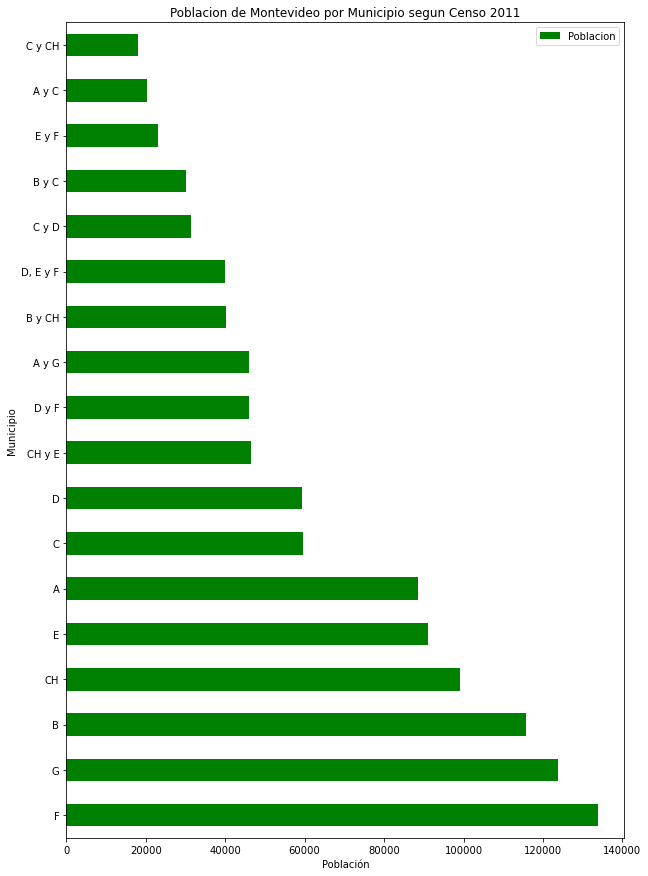

In [11]:
# Visualizamos los municipios por medio de un gráfico de barras horizontales
df_montevideo_all_municipio.set_index('Municipio').plot(kind='barh', figsize=(10,15) , color = 'green')
plt.xlabel('Población')
plt.ylabel('Municipio')
plt.title('Poblacion de Montevideo por Municipio segun Censo 2011')
plt.show()

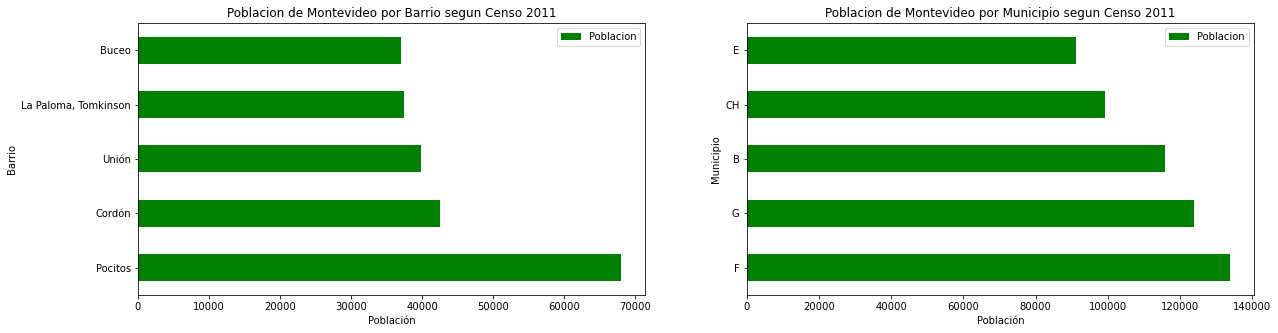

In [12]:
# Graficamos los top 5 para barrios y municipios
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
#Top 5 barrios
df_montevideo.set_index('Barrio').head(5).plot(kind='barh', figsize=(20,5) , color = 'green', ax=ax0)
ax0.set_xlabel('Población')
ax0.set_ylabel('Barrio')
ax0.set_title('Poblacion de Montevideo por Barrio segun Censo 2011')

#Top 5 municipios
df_montevideo_all_municipio.set_index('Municipio').head(5).plot(kind='barh', figsize=(20,5) , color = 'green', ax = ax1)
ax1.set_xlabel('Población')
ax1.set_ylabel('Municipio')
ax1.set_title('Poblacion de Montevideo por Municipio segun Censo 2011')

plt.show()

In [13]:
!pip install wget
import wget

#https://www.ine.gub.uy/c/document_library/get_file?uuid=75b6cb00-387e-40ee-a694-eb64314e81db&groupId=10181

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=ac306fc020cfb5c4a05103c4847a9211c1c72a2cc8d4705192a3c3694a9ebf56
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [16]:
!wget -O 'ECH_2017.rar' https://www.ine.gub.uy/c/document_library/get_file?uuid=75b6cb00-387e-40ee-a694-eb64314e81db&groupId=10181

In [3]:
import pandas as pd
# Dado que no es posible descargar el archivo rar directamente de la pàgina, se descarga a disco y  extrae como .csv
df_montevideo_encuesta = pd.read_csv('C:\Users\user\Dowloads\Downloads\H_2017_Terceros.csv')
df_montevideo_encuesta.head()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3521660258.py, line 3)